In [92]:
import os
import sys

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

PATH = os.path.dirname(os.getcwd())
dPATH = PATH + '/data/'
sPATH = PATH + '/scripts/'
iPATH = PATH + '/images/'

In [93]:
df = pd.read_csv(dPATH + 'all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [95]:
df.dtypes

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

In [96]:
GDP_descending = df.groupby('Country', as_index = False)[['Country','GDP']].mean()
GDP_average_descending = GDP_descending.sort_values('GDP',ascending=False, ignore_index = True)

GDP_average_descending

,Country,GDP
0,United States of America,1.407500e+13
1,China,4.957714e+12
2,Germany,3.094776e+12
3,Mexico,9.766506e+11
4,Chile,1.697888e+11
5,Zimbabwe,9.062580e+09


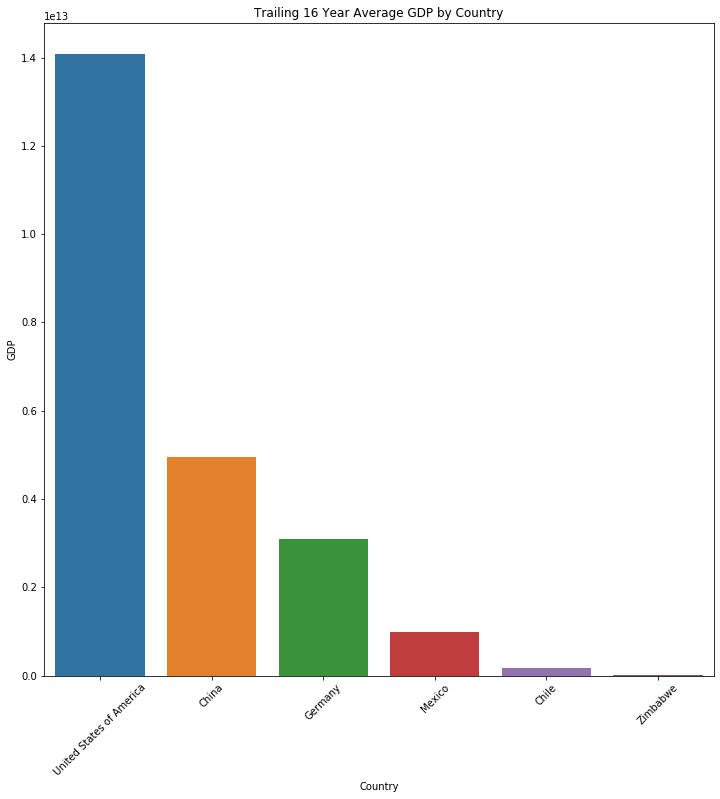

<Figure size 432x288 with 0 Axes>

In [97]:
time_span = df.Year.max() - df.Year.min() + 1

fig = plt.figure(figsize = (12,12))
ax = sns.barplot(data = GDP_average_descending, x = 'Country', y = 'GDP')
plt.xticks(rotation = 45)
ax.set_title(f'Trailing {time_span} Year Average GDP by Country', fontsize = 12)
#plt.legend(GDP_average_descending.Country)
plt.savefig(iPATH + f'Trailing {time_span} Year Average GDP by Country.PNG')
plt.show()
plt.clf()

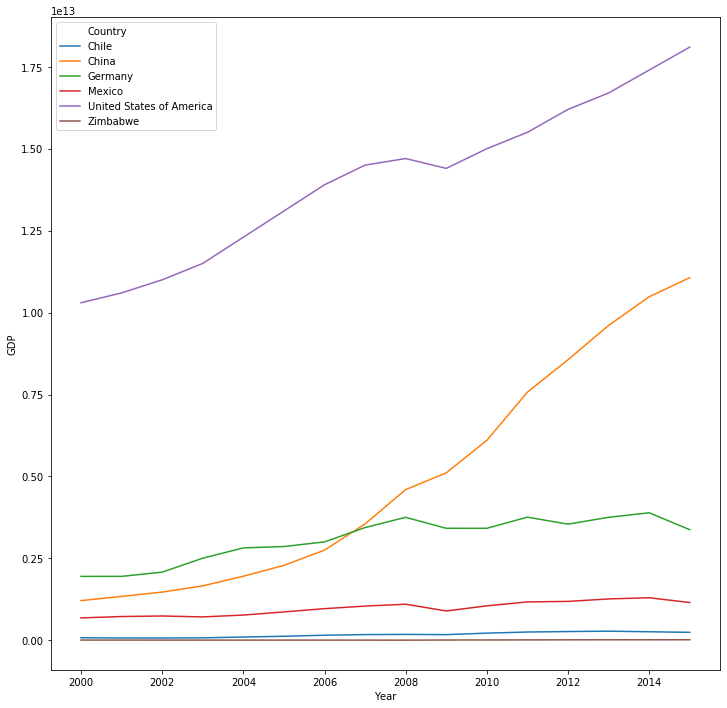

In [98]:
fig = plt.figure(figsize = (12,12))
ax1 = sns.lineplot(data = df, x = 'Year', y = 'GDP', hue = 'Country')
plt.savefig(iPATH + 'GDP vs. Time -- hue Country.PNG')

<Figure size 432x288 with 0 Axes>

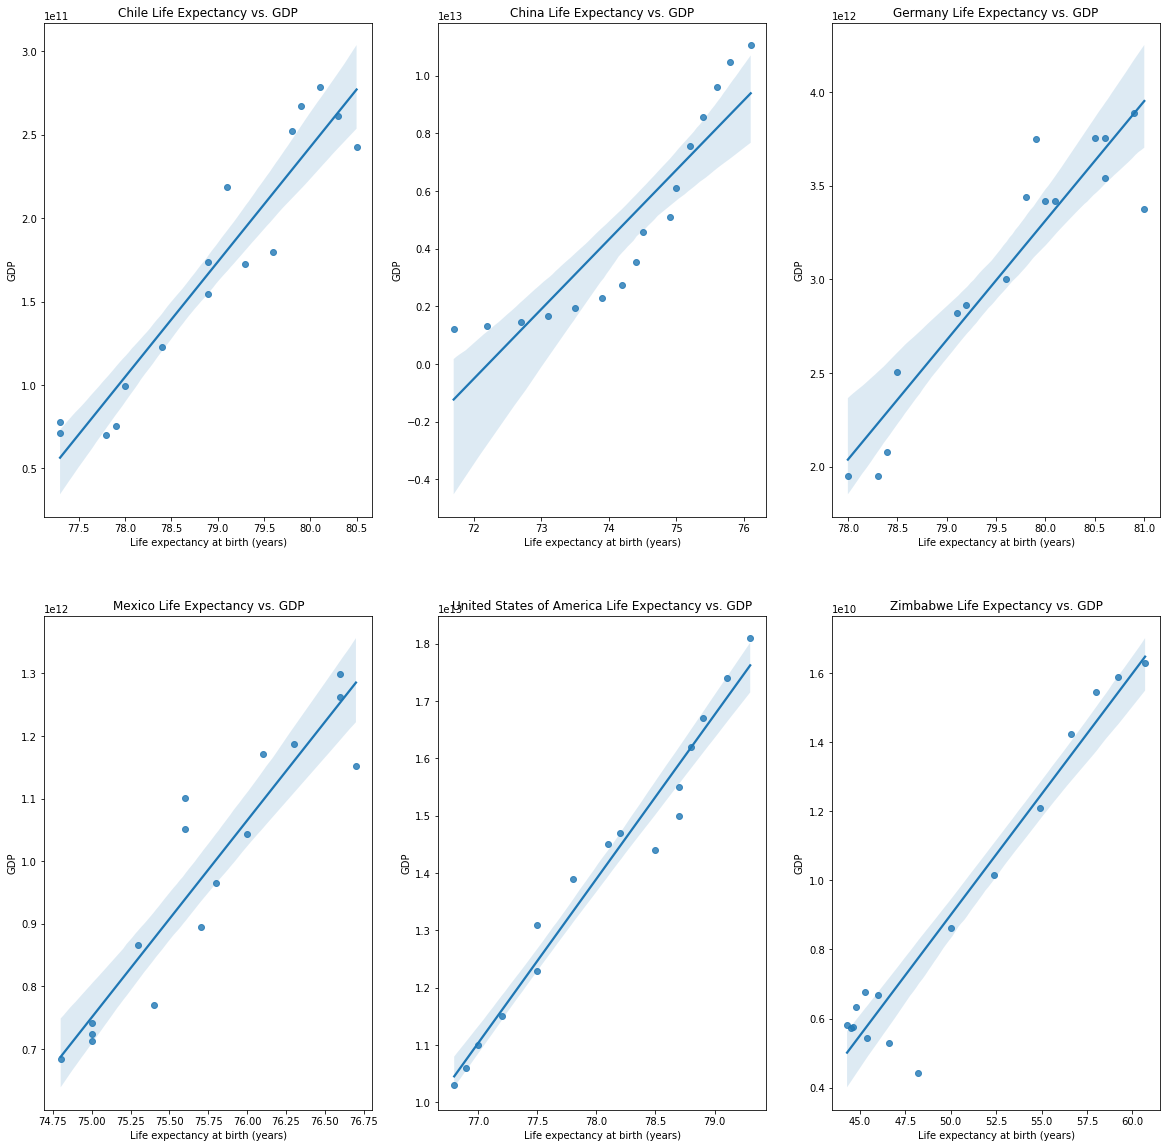

In [99]:
plt.clf()

countries = list(df['Country'].unique())

i = 1
fig = plt.figure(figsize = (20,20))
for country in countries:
    df_temp = df[df.Country == country]
    ax = fig.add_subplot(2,3,i)
    sns.regplot(data = df_temp, x = 'Life expectancy at birth (years)', y ='GDP')
    plt.title(f'{country} Life Expectancy vs. GDP')
    i+=1
plt.savefig(iPATH + 'Life Expectancy vs. GDP -- 2x3.PNG')

Make a scatter plot of Average LE v Average GDP

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

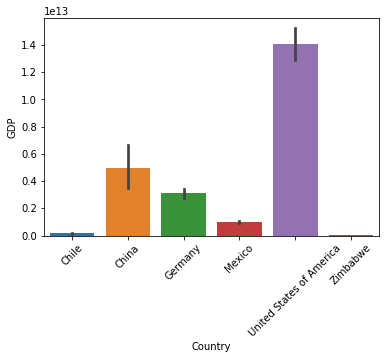

In [100]:
plt.clf()

ax = sns.barplot(data = df, x = 'Country', y = 'GDP')
plt.xticks(rotation = 45)

In [101]:
total_GDP_by_year = df.groupby('Year', as_index = True).sum()['GDP']
total_GDP_by_year

Year
2000    1.422950e+13
2001    1.469251e+13
2002    1.536733e+13
2003    1.646068e+13
2004    1.794988e+13
2005    1.924245e+13
2006    2.078009e+13
2007    2.271450e+13
2008    2.433591e+13
2009    2.400392e+13
2010    2.579752e+13
2011    2.826579e+13
2012    2.977249e+13
2013    3.161555e+13
2014    3.334835e+13
2015    3.395139e+13
Name: GDP, dtype: float64

In [102]:
for year in total_GDP_by_year.index:
    print(total_GDP_by_year[year])

14229498889752.0
14692511308660.0
15367328927835.0
16460675051640.0
17949883991258.0
19242446215200.0
20780092896500.0
22714497950100.0
24335913702800.0
24003919573608.0
25797519859710.0
28265790450749.0
29772494490252.0
31615545768659.0
33348351049236.0
33951392667807.0


In [104]:
#df['Total GDP'] = 0
#df
for row in df.index:
    index = df.iloc[row]['Year']
    df.loc[row,'Total GDP'] = total_GDP_by_year[index]
df['Pct of GDP'] = df['GDP'] / df['Total GDP']*100
df

,Country,Year,Life expectancy at birth (years),GDP,Total GDP,Pct of GDP
0,Chile,2000,77.3,7.786093e+10,1.422950e+13,0.547180
1,Chile,2001,77.3,7.097992e+10,1.469251e+13,0.483103
2,Chile,2002,77.8,6.973681e+10,1.536733e+13,0.453799
3,Chile,2003,77.9,7.564346e+10,1.646068e+13,0.459540
4,Chile,2004,78.0,9.921039e+10,1.794988e+13,0.552708
...,...,...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10,2.826579e+13,0.042802
92,Zimbabwe,2012,56.6,1.424249e+10,2.977249e+13,0.047838
93,Zimbabwe,2013,58.0,1.545177e+10,3.161555e+13,0.048874
94,Zimbabwe,2014,59.2,1.589105e+10,3.334835e+13,0.047652


<Figure size 432x288 with 0 Axes>

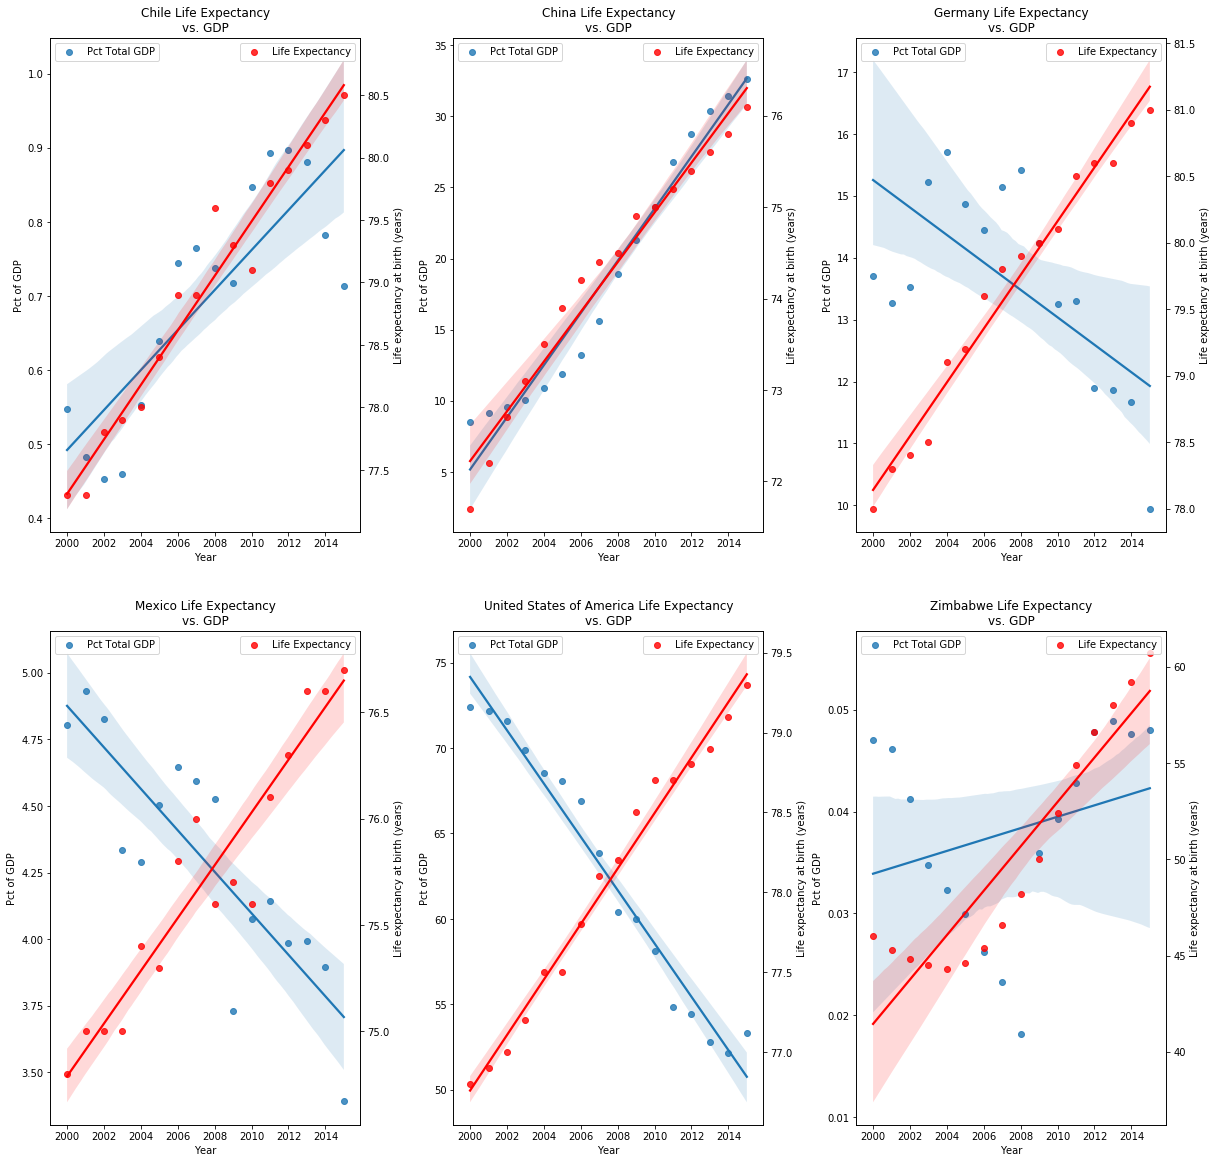

In [127]:
plt.clf()

countries = list(df['Country'].unique())
i = 1
fig = plt.figure(figsize = (20,20))
for country in countries:
    df_temp = df[df.Country == country]
    ax = fig.add_subplot(2,3,i)
    sns.regplot(data = df_temp, x = 'Year', y ='Pct of GDP', label = 'Pct Total GDP')
    ax2 = ax.twinx()
    sns.regplot(data = df_temp, x = 'Year', y ='Life expectancy at birth (years)',ax=ax2, color = 'red', label = 'Life Expectancy')
    plt.title(f'{country} Life Expectancy\nvs. GDP')
    ax.legend(loc = 'upper left')
    ax2.legend(loc = 'upper right')
    i+=1
plt.subplots_adjust(wspace = .3)
plt.savefig(iPATH + 'Life Ex v Time vs Pct total GDP v Time.PNG')